In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("BAJFINANCE.csv")

In [3]:
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,BAJAUTOFIN,EQ,46.95,49.45,50.75,46.5,50.75,50.75,50.05,7600,3.803800e+10,NaN,NaN,NaN
1,2000-01-04,BAJAUTOFIN,EQ,50.75,53.20,53.20,47.9,48.00,48.10,48.56,5000,2.428000e+10,NaN,NaN,NaN
2,2000-01-05,BAJAUTOFIN,EQ,48.10,46.55,47.40,44.6,44.60,44.60,45.47,3500,1.591450e+10,NaN,NaN,NaN
3,2000-01-06,BAJAUTOFIN,EQ,44.60,43.50,46.00,42.1,46.00,45.25,44.43,6200,2.754750e+10,NaN,NaN,NaN
4,2000-01-07,BAJAUTOFIN,EQ,45.25,48.00,48.00,42.0,42.90,42.90,44.44,3500,1.555550e+10,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5070 entries, 0 to 5069
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                5070 non-null   object 
 1   Symbol              5070 non-null   object 
 2   Series              5070 non-null   object 
 3   Prev Close          5070 non-null   float64
 4   Open                5070 non-null   float64
 5   High                5070 non-null   float64
 6   Low                 5070 non-null   float64
 7   Last                5070 non-null   float64
 8   Close               5070 non-null   float64
 9   VWAP                5070 non-null   float64
 10  Volume              5070 non-null   int64  
 11  Turnover            5070 non-null   float64
 12  Trades              2291 non-null   float64
 13  Deliverable Volume  4624 non-null   float64
 14  %Deliverble         4624 non-null   float64
dtypes: float64(11), int64(1), object(3)
memory usage: 594.3

In [5]:
df.isnull().sum()

Date                     0
Symbol                   0
Series                   0
Prev Close               0
Open                     0
High                     0
Low                      0
Last                     0
Close                    0
VWAP                     0
Volume                   0
Turnover                 0
Trades                2779
Deliverable Volume     446
%Deliverble            446
dtype: int64

In [8]:
df['Date']=pd.to_datetime(df['Date'])

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5070 entries, 0 to 5069
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                5070 non-null   datetime64[ns]
 1   Symbol              5070 non-null   object        
 2   Series              5070 non-null   object        
 3   Prev Close          5070 non-null   float64       
 4   Open                5070 non-null   float64       
 5   High                5070 non-null   float64       
 6   Low                 5070 non-null   float64       
 7   Last                5070 non-null   float64       
 8   Close               5070 non-null   float64       
 9   VWAP                5070 non-null   float64       
 10  Volume              5070 non-null   int64         
 11  Turnover            5070 non-null   float64       
 12  Trades              2291 non-null   float64       
 13  Deliverable Volume  4624 non-null   float64     

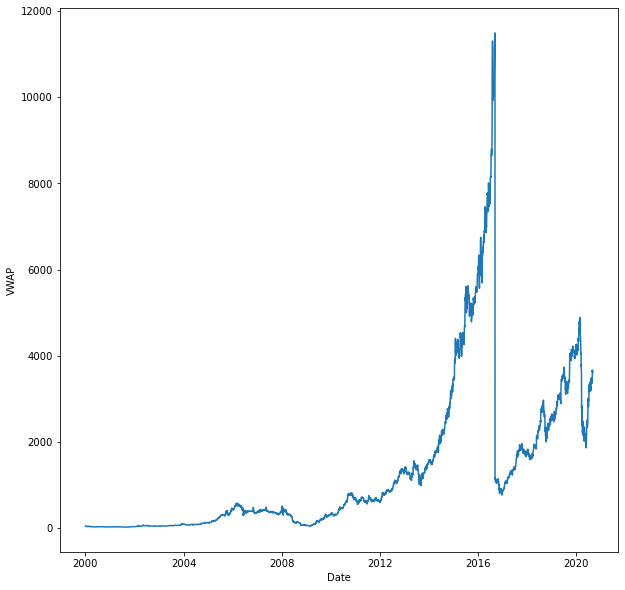

In [12]:
plt.figure(figsize=(10,10))
sns.lineplot(x="Date",y="VWAP",data=df)
plt.show()

In [13]:
df.shape

(5070, 15)

In [14]:
# Deleting Null values
df.dropna(inplace=True)

In [15]:
df.isnull().sum()

Date                  0
Symbol                0
Series                0
Prev Close            0
Open                  0
High                  0
Low                   0
Last                  0
Close                 0
VWAP                  0
Volume                0
Turnover              0
Trades                0
Deliverable Volume    0
%Deliverble           0
dtype: int64

In [16]:
data=df.copy()

In [17]:
data.shape

(2291, 15)

In [19]:
# Checking data types of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2291 entries, 2779 to 5069
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                2291 non-null   datetime64[ns]
 1   Symbol              2291 non-null   object        
 2   Series              2291 non-null   object        
 3   Prev Close          2291 non-null   float64       
 4   Open                2291 non-null   float64       
 5   High                2291 non-null   float64       
 6   Low                 2291 non-null   float64       
 7   Last                2291 non-null   float64       
 8   Close               2291 non-null   float64       
 9   VWAP                2291 non-null   float64       
 10  Volume              2291 non-null   int64         
 11  Turnover            2291 non-null   float64       
 12  Trades              2291 non-null   float64       
 13  Deliverable Volume  2291 non-null   float64  

In [24]:
lag_features=['High','Low','Volume','Turnover','Trades']

In [35]:
# Creating Rolling window for each features

for feature in lag_features:
    data[feature+'mean3']=data[feature].rolling(window=3).mean()
    data[feature+'mean7']=data[feature].rolling(window=7).mean() 

In [36]:
for feature in lag_features:
    data[feature+'std3']=data[feature].rolling(window=3).std()
    data[feature+'std7']=data[feature].rolling(window=7).std() 

In [37]:
data.columns

Index(['Date', 'Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble', 'Highmean3', 'Highmean7', 'Lowmean3', 'Lowmean7',
       'Volumemean3', 'Volumemean7', 'Turnovermean3', 'Turnovermean7',
       'Tradesmean3', 'Tradesmean7', 'Highstd3', 'Highstd7', 'Lowstd3',
       'Lowstd7', 'Volumestd3', 'Volumestd7', 'Turnoverstd3', 'Turnoverstd7',
       'Tradesstd3', 'Tradesstd7'],
      dtype='object')

In [38]:
data.shape

(2291, 35)

In [39]:
data.isnull().sum()

Date                  0
Symbol                0
Series                0
Prev Close            0
Open                  0
High                  0
Low                   0
Last                  0
Close                 0
VWAP                  0
Volume                0
Turnover              0
Trades                0
Deliverable Volume    0
%Deliverble           0
Highmean3             2
Highmean7             6
Lowmean3              2
Lowmean7              6
Volumemean3           2
Volumemean7           6
Turnovermean3         2
Turnovermean7         6
Tradesmean3           2
Tradesmean7           6
Highstd3              2
Highstd7              6
Lowstd3               2
Lowstd7               6
Volumestd3            2
Volumestd7            6
Turnoverstd3          2
Turnoverstd7          6
Tradesstd3            2
Tradesstd7            6
dtype: int64

In [40]:
data.dropna(inplace=True)

In [41]:
data.isnull().sum()

Date                  0
Symbol                0
Series                0
Prev Close            0
Open                  0
High                  0
Low                   0
Last                  0
Close                 0
VWAP                  0
Volume                0
Turnover              0
Trades                0
Deliverable Volume    0
%Deliverble           0
Highmean3             0
Highmean7             0
Lowmean3              0
Lowmean7              0
Volumemean3           0
Volumemean7           0
Turnovermean3         0
Turnovermean7         0
Tradesmean3           0
Tradesmean7           0
Highstd3              0
Highstd7              0
Lowstd3               0
Lowstd7               0
Volumestd3            0
Volumestd7            0
Turnoverstd3          0
Turnoverstd7          0
Tradesstd3            0
Tradesstd7            0
dtype: int64

In [42]:
ind_features=['Highmean3', 'Highmean7', 'Lowmean3', 'Lowmean7',
       'Volumemean3', 'Volumemean7', 'Turnovermean3', 'Turnovermean7',
       'Tradesmean3', 'Tradesmean7', 'Highstd3', 'Highstd7', 'Lowstd3',
       'Lowstd7', 'Volumestd3', 'Volumestd7', 'Turnoverstd3', 'Turnoverstd7',
       'Tradesstd3', 'Tradesstd7']

In [43]:
training_data=data[0:1800]
test_data=data[1800:]

In [44]:
# Install ARIMA model

!pip install pmdarima

Defaulting to user installation because normal site-packages is not writeable


In [64]:
from pmdarima import auto_arima 

In [65]:
import warnings
from warnings import filterwarnings
filterwarnings("ignore")

In [66]:
model=auto_arima(y=training_data['VWAP'],X=training_data[ind_features],trace=True)
model

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=20931.535, Time=12.80 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=20925.225, Time=6.72 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=20926.349, Time=7.52 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=20926.321, Time=9.53 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=32616.913, Time=6.90 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=20929.235, Time=9.96 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 53.464 seconds


ARIMA(order=(0, 0, 0), scoring_args={}, suppress_warnings=True)

In [53]:
x=training_data['VWAP']
y=training_data[ind_features]

In [88]:
model.fit(x,y)

ARIMA(order=(0, 0, 0), scoring_args={}, suppress_warnings=True)

In [111]:
forecast=model.predict(n_periods=len(test_data),X=test_data[ind_features])
forecast

1800    2600.730884
1801    2625.139119
1802    2600.987731
1803    2556.396862
1804    2572.838054
           ...     
2280    3447.809278
2281    3677.909829
2282    3685.178415
2283    3583.692053
2284    3392.938617
Length: 485, dtype: float64

In [118]:
forecast.index = test_data.index

In [119]:
test_data["Forecast_Arima"]=forecast

In [120]:
test_data["Forecast_Arima"]

4585    2600.730884
4586    2625.139119
4587    2600.987731
4588    2556.396862
4589    2572.838054
           ...     
5065    3447.809278
5066    3677.909829
5067    3685.178415
5068    3583.692053
5069    3392.938617
Name: Forecast_Arima, Length: 485, dtype: float64

In [122]:
print(test_data.columns)

Index(['Date', 'Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble', 'Highmean3', 'Highmean7', 'Lowmean3', 'Lowmean7',
       'Volumemean3', 'Volumemean7', 'Turnovermean3', 'Turnovermean7',
       'Tradesmean3', 'Tradesmean7', 'Highstd3', 'Highstd7', 'Lowstd3',
       'Lowstd7', 'Volumestd3', 'Volumestd7', 'Turnoverstd3', 'Turnoverstd7',
       'Tradesstd3', 'Tradesstd7', 'Forecast_ARIMA', 'Forecast_Arima'],
      dtype='object')


In [123]:
test_data.head(2)

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,...,Lowstd3,Lowstd7,Volumestd3,Volumestd7,Turnoverstd3,Turnoverstd7,Tradesstd3,Tradesstd7,Forecast_ARIMA,Forecast_Arima
4585,2018-09-11,BAJFINANCE,EQ,2615.65,2621.00,2668.80,2562.25,2600.0,2600.75,2619.05,...,56.544592,53.60858,1.130645e+06,816410.887112,2.905375e+14,2.170264e+14,40756.099335,32012.681782,NaN,2600.730884
4586,2018-09-12,BAJFINANCE,EQ,2600.75,2617.95,2636.95,2516.10,2588.9,2594.00,2577.54,...,40.110047,66.23689,9.025933e+05,835125.949241,2.325644e+14,2.156391e+14,31297.267202,34656.587966,NaN,2625.139119


<AxesSubplot:>

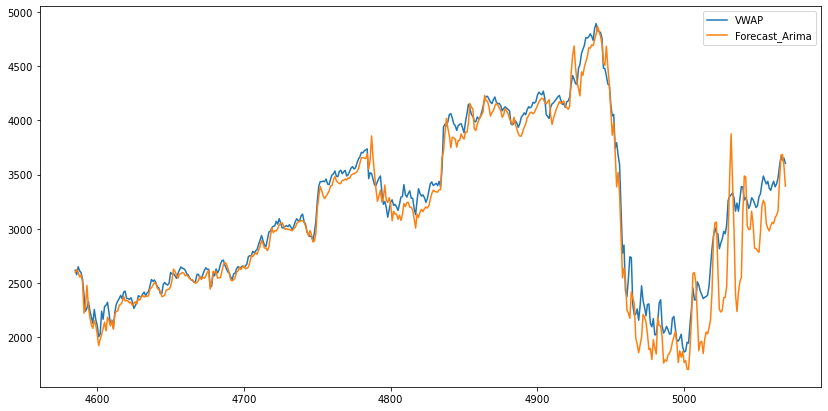

In [127]:
test_data[['VWAP','Forecast_Arima']].plot(figsize=(14,7))

In [128]:
# Accuracy of model

from sklearn import metrics

In [130]:
metrics.r2_score(test_data['VWAP'],test_data['Forecast_Arima'])*100

93.48511139069383